<a href="https://colab.research.google.com/github/nadiataoufik/Census_income-/blob/master/customor_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [5]:
#load the data 
data=pd.read_csv('/content/drive/MyDrive/Facebook_Ads_2.csv',encoding='latin-1')
data.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [6]:
# data exploration 
print('number of customer: ',len(data))

number of customer:  499


In [7]:
clicked=data[data['Clicked']==1]
no_clicked=data[data['Clicked']==0]

In [8]:
print('number of customers who clicked ads: ',len(clicked))

number of customers who clicked ads:  250


In [9]:
print('number of customer who did click the ads:',len(no_clicked))

number of customer who did click the ads: 249


In [11]:
print('percentage who clicked an ad :',len(clicked)/len(data)*100)

percentage who clicked an ad : 50.1002004008016


In [13]:
print('percentage who did clicked an add :',len(no_clicked)/len(data)*100)

percentage who did clicked an add : 49.899799599198396


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


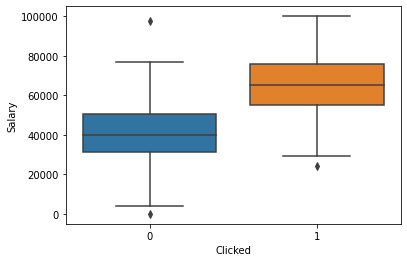

In [19]:
#data visualization 
sns.boxplot(data['Clicked'],data['Salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


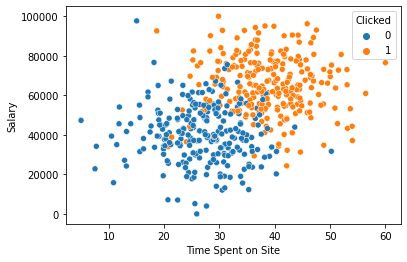

In [74]:
sns.scatterplot(data['Time Spent on Site'],data['Salary'],hue=data['Clicked'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


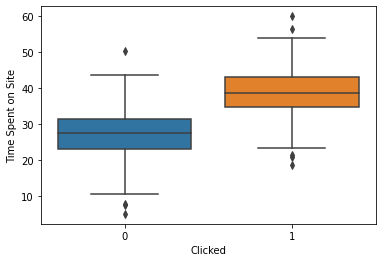

In [23]:
#check the time spent 
sns.boxplot(data['Clicked'],data['Time Spent on Site'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


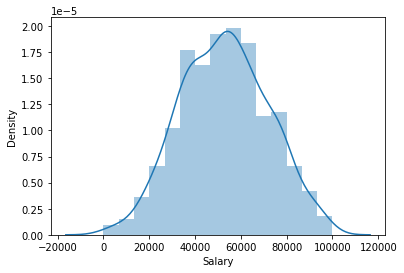

In [26]:
sns.distplot(data['Salary'])

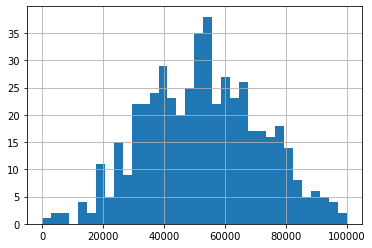

In [27]:
data['Salary'].hist(bins=34)

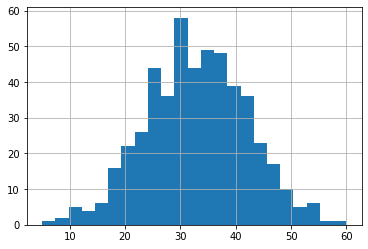

In [32]:

data['Time Spent on Site'].hist(bins=23)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


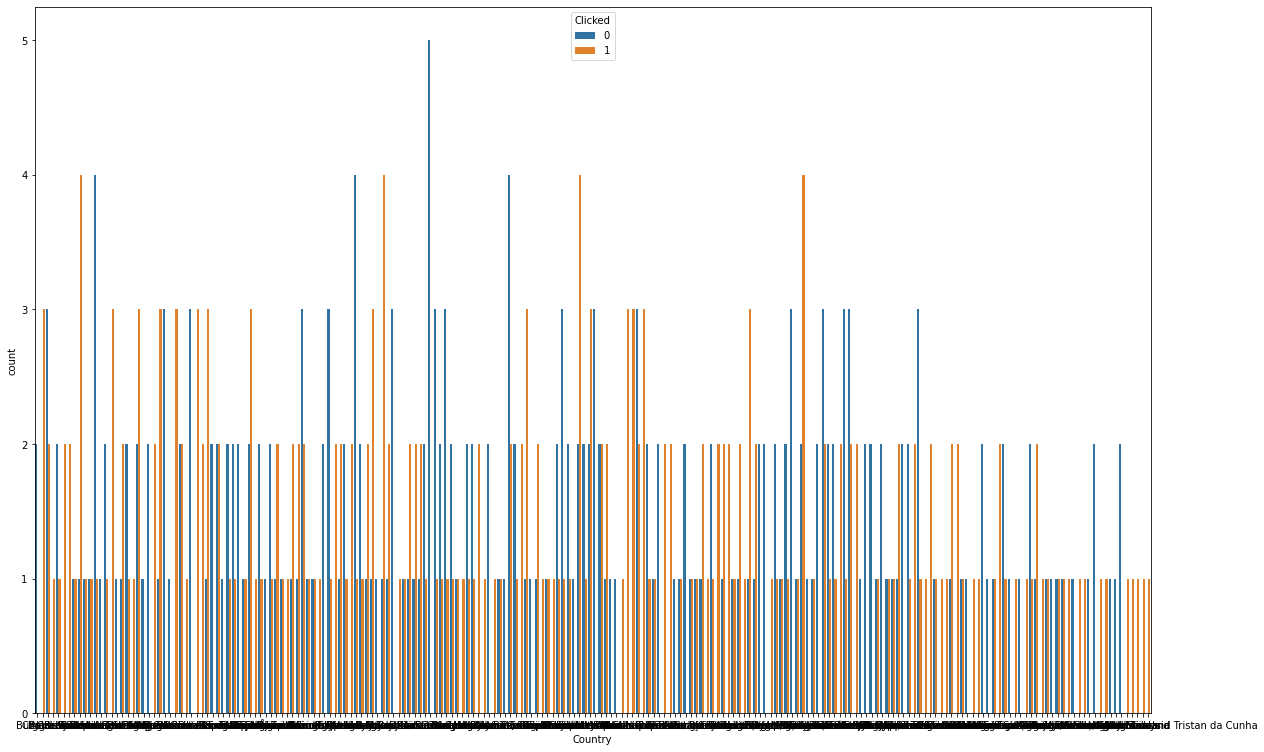

In [34]:
plt.figure(figsize=(20,13))
sns.countplot(data['Country'],hue=data['Clicked'])

In [35]:
#data cleaning
data.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [36]:
data.columns.values

array(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'], dtype=object)

In [37]:
data.drop(['Names', 'emails', 'Country'],axis=1,inplace=True)

In [38]:
data.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


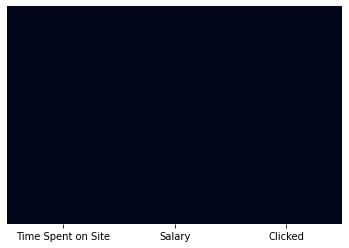

In [39]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [40]:
data.isnull().sum()

Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [41]:
data.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [42]:
# create the inputs and target 
x=data.drop(['Clicked'],axis=1).values
y=data['Clicked'].values


In [43]:
#split the data 
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [46]:
x_train.shape

(399, 2)

In [47]:
x_test.shape

(100, 2)

In [48]:
# feature scalling 
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()

In [50]:
x_train_scaled=scaler.fit_transform(x_train)

In [51]:
x_test_scaled=scaler.transform(x_test)

3.1965519064896738e-15

In [52]:
#model training 
from sklearn.linear_model import LogisticRegression

In [53]:
reg=LogisticRegression()

In [59]:
# fit the model 
reg.fit(x_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred_train=reg.predict(x_train_scaled)

In [61]:
y_pred_test=reg.predict(x_test_scaled)

In [62]:
# checking the accuracy 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [63]:
#training accuracy 
cm_train=confusion_matrix(y_train,y_pred_train)
cm_train

array([[180,  17],
       [ 16, 186]])

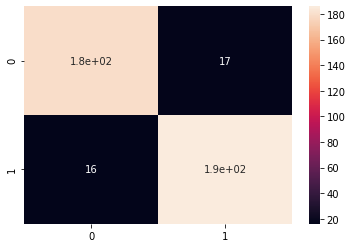

In [64]:
sns.heatmap(cm_train,annot=True)

In [66]:
acc_train=accuracy_score(y_train,y_pred_train)
acc_train

0.9172932330827067

In [67]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       197
           1       0.92      0.92      0.92       202

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



In [68]:
#checking the testing accuracy 
cm_test=confusion_matrix(y_test,y_pred_test)
cm_test

array([[45,  7],
       [ 5, 43]])

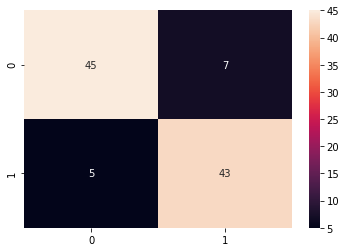

In [69]:
sns.heatmap(cm_test,annot=True)

In [70]:
acc_test=accuracy_score(y_test,y_pred_test)
acc_test

0.88

In [71]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        52
           1       0.86      0.90      0.88        48

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



In [75]:
#visualize training and testinf dataset 
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


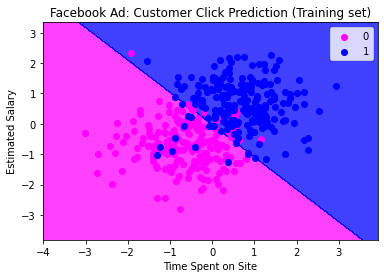

In [91]:
X_set,y_set=x_train_scaled,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()